In [1]:
# Lets get some data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv 

--2023-09-21 20:37:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.09s   

2023-09-21 20:37:37 (14.9 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("./housing.csv")

In [24]:
df.head().dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<Axes: xlabel='median_house_value', ylabel='Count'>

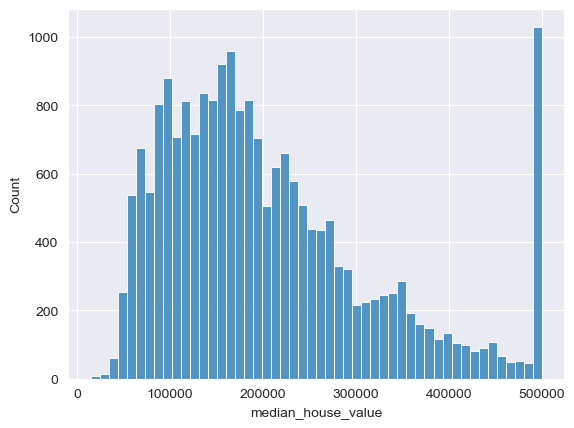

In [7]:
sns.histplot(df.median_house_value, bins=50)

In [43]:
reduced_df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [44]:
base = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
]

In [45]:
subset_df = reduced_df[base]

In [46]:
subset_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [49]:
# Checking which series has null values
subset_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [51]:
# Checking the median of population
subset_df.population.median()

1195.0

In [64]:
np.random.seed(42)

n = len(subset_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [65]:
n, n_val+n_test+n_train

(15687, 15687)

In [66]:
idx = np.arange(n)

In [67]:
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [70]:
df_train = subset_df.iloc[idx[:n_train]]
df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
df_test = subset_df.iloc[idx[n_train+n_val:]]

In [71]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [72]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [73]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [74]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526
